# <center>Text Mining</center>

___



## Import Libraries

In [1]:
import numpy as np
import pandas as pd

#!pip install urllib
import urllib.request as url 

#!pip install wikipedia
import wikipedia as w 

#!pip install bs4
from bs4 import BeautifulSoup as bs

import re
import requests
import matplotlib.pyplot as plt

import random
random.seed(123)

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#!conda install -c conda-forge spacy
#!python -m spacy download en
#!pip install -U spacy
import spacy
nlp = spacy.load("en_core_web_sm")

# Problem Statement: Determining the Latent Topics from blogs

## First Level Extraction
Extracting all **Authors** and their corresponding **blog links** at **level 1:**

https://indianbloggers.org/


## Second Level Extraction
For each blogger we will perfom a web scrapping from their respestive blog page and get links for other blogs of the same blogger:

## Third Level web scraping
In the third level we will extract the **blog contents** of each blog.  



In [77]:
# A dictionary to store the data we'll retrieve so that we can 
#store the value as well as the link.
# 1. Grab  the list from wikipedia.

html = "https://indianbloggers.org/"

def extract_web(link):
    html = url.urlopen(link).read()
    soup = bs(html, 'html.parser')
    d = {'title':[],'links':[]}
    for link in soup.find_all('a'):
         if len(link.text.strip()) > 1 and bool(re.match('http',link['href'])) and not bool(
            re.search('indianblogginers|indianbloggers|twitter|facebook|images|youtube|docs.google.com',link['href'])) and not bool(
            re.search('next page|about|store|meeting|google|contact|jan|feb|mar|apr|jun|jul|aug|sep|oct|nov|dec|january|february|march|april|may|june|july|august|september|october|november|december|f.a.q.|faq',link.text.lower())) :
            d['title'].append(link.text)
            d['links'].append(link['href'])

    blog_list = pd.DataFrame(d)
    return blog_list

blog_list = extract_web(html)

In [78]:
blog_list.head(15)

,title,links
0,Amit Agarwal,http://www.labnol.org/
1,Jyotsna Kamat,http://www.kamat.com/jyotsna/blog/
2,Amit Varma,http://www.indiauncut.com/
3,Sidin Vadukut,http://www.whatay.com/
4,Hawkeye,http://hawkeyeview.blogspot.in/
5,Neha,http://www.withinandwithout.com/
6,Rashmi Bansal,http://youthcurry.blogspot.in/
7,Dina Mehta,http://dinamehta.com/
8,Amit Agarwal,http://www.labnol.org/
9,Patrix,http://www.ipatrix.com/


In [79]:
blog_list.shape

(338, 2)

## Web scrapping of second level from the above table

In [73]:
blog_list['links'][2]

'http://www.indiauncut.com/'

In [80]:
df1 = pd.DataFrame(columns=['title', 'links'])
df2 = extract_web(blog_list['links'][2])
pd.concat([df1, df2])

,title,links
0,The IU Blog,http://www.indiauncut.com/iublog/
1,Linkastic,http://www.indiauncut.com/linkastic/
2,Rave Out,http://www.indiauncut.com/raveout/
3,Extrowords,http://www.indiauncut.com/extrowords/
4,Workoutable,http://www.indiauncut.com/workoutable/
5,The old India Uncut,http://indiauncut.blogspot.com
6,been longlisted,http://www.manasianliteraryprize.org/2009/2008longlist.php
7,click here,http://indiauncut.com/myfriendsancho
8,Click here,http://indiauncut.com/myfriendsancho/hachette
9,here,http://www.indiauncut.com/iublog/categories/category/My%20Friend%20Sancho/


In [75]:
blog_list_2nd = pd.DataFrame(columns=['Author','title', 'links'])

for rownum, blogs in blog_list[0:10].iterrows():
    #print(blogs['links'])
    author = blogs['title']
    #print(author)
    
    try :
        temp = extract_web(blogs['links'])
        author = author 
        temp['Author'] = author
        blog_list_2nd = pd.concat([blog_list_2nd, temp])
        #print(temp)
        
    except:
        pass

In [76]:
blog_list_2nd

,Author,links,title
0,Amit Agarwal,https://www.labnol.org/internet/101-useful-websites/18078/,Most Useful Websites
1,Amit Agarwal,https://www.labnol.org/internet/learn-coding-online/28537/,Learn to Code
2,Amit Agarwal,https://dictation.io/,Voice Dictation
3,Amit Agarwal,https://www.labnol.org/software/essential-mac-utilities/9479/,The Best Mac Apps
4,Amit Agarwal,https://www.labnol.org/internet/sell-music-online/13403/,Sell your music online
5,Amit Agarwal,https://www.labnol.org/internet/personalized-mail-merge-in-gmail/20981/,Mail Merge for Gmail
6,Amit Agarwal,https://www.labnol.org//internet/secure-your-wireless-wifi-network/10549/,Secure your WiFi
7,Amit Agarwal,http://go.ctrlq.org/GoogleAutomation,PDF brochure
0,Amit Varma,http://www.indiauncut.com/iublog/,The IU Blog
1,Amit Varma,http://www.indiauncut.com/linkastic/,Linkastic


# Level 3

# Scraping the Blogs

In [10]:
%%time
data = {'Author':[], 'title':[], 'link':[], 'text':[]}

for rownum, row in blog_list_2nd.iterrows():
    #print(row['links'])
    author = row['Author']
    title = row['title']
    link = row['links']
    #print(row)
    
    try:
        html = url.urlopen(link).read()
        soup = bs(html, 'html.parser')
        form_p_all = soup.select('p > form')
        for form in form_p_all:
            form.decompose()
            
        #Navigations in the side
        nav_div = soup.find_all('div', id=re.compile(".*[nav].$"))
        for nav in nav_div:
            nav.decompose()

        text_links = soup.select('p > a')
        for text_link in text_links:
            #print(link)
            text_link.replaceWith('')
            text_link.decompose()
    
        text_all = soup.find_all('p')
        text_data = ""
        for text in text_all:
            #print(text)
            if not 'copyright' in text.text.lower():
                text_data = text_data +" " +text.text
    except:
        pass
    
    if text_data != "":
        print(text_data)
        data['Author'].append(author)
        data['title'].append(title)
        data['link'].append(link)
        data['text'].append(text_data)

https://www.labnol.org/internet/101-useful-websites/18078/
https://www.labnol.org/internet/learn-coding-online/28537/
https://dictation.io/
https://www.labnol.org/software/essential-mac-utilities/9479/
https://www.labnol.org/internet/sell-music-online/13403/
https://www.labnol.org/internet/personalized-mail-merge-in-gmail/20981/
https://www.labnol.org//internet/secure-your-wireless-wifi-network/10549/
http://go.ctrlq.org/GoogleAutomation
http://www.indiauncut.com/iublog/
http://www.indiauncut.com/linkastic/
http://www.indiauncut.com/raveout/
http://www.indiauncut.com/extrowords/
http://www.indiauncut.com/workoutable/
http://indiauncut.blogspot.com
http://www.manasianliteraryprize.org/2009/2008longlist.php
http://indiauncut.com/myfriendsancho
http://indiauncut.com/myfriendsancho/hachette
http://www.indiauncut.com/iublog/categories/category/My%20Friend%20Sancho/
http://indiauncut.com/iublog/article/for-this-brave-new-world-of-cricket-we-have-ipl-and-england-to-thank/
http://www.indiauncu

http://www.indiaspend.com/cover-story/why-indian-workplaces-are-losing-women-our-nationwide-investigation-begins-53927
http://indiauncut.com/iublog/article/misogyny-is-the-oldest-indian-tradition/
https://www.thinkpragati.com/podcast/the-seen-and-the-unseen/5012/claiming-your-space/
https://www.thinkpragati.com/podcast/the-seen-and-the-unseen/4966/these-funny-times/
http://indiauncut.com/iublog/article/i-am-a-feminist.-you-should-be-too/
http://www.indiauncut.com/iublog/categories/category/Essays and Op-Eds/
http://www.indiauncut.com/iublog/categories/category/Freedom/
http://www.indiauncut.com/iublog/categories/category/India/
http://www.indiauncut.com/iublog/categories/category/the-rationalist/
http://indiauncut.com/iublog/article/jumla/
http://www.indiauncut.com/iublog/categories/category/rhyme-and-reason/
http://epaper.timesgroup.com/Olive/ODN/TimesOfIndia/#
http://indiauncut.com/iublog/article/jumla/
http://www.indiauncut.com/iublog/categories/category/India/
http://www.indiauncut

https://www.blogger.com/share-post.g?blogID=7278237&postID=305803396502560428&target=pinterest
http://hawkeyeview.blogspot.com/2013/08/manidha-manidha.html#links
http://hawkeyeview.blogspot.com/2013/08/shakunthala-dushyantha.html
http://en.wikipedia.org/wiki/The_Recognition_of_Shakuntala
https://plus.google.com/100757967372672523158
http://hawkeyeview.blogspot.com/2013/08/shakunthala-dushyantha.html
https://www.blogger.com/comment.g?blogID=7278237&postID=4052745570084805717
https://www.blogger.com/share-post.g?blogID=7278237&postID=4052745570084805717&target=email
https://www.blogger.com/share-post.g?blogID=7278237&postID=4052745570084805717&target=blog
https://www.blogger.com/share-post.g?blogID=7278237&postID=4052745570084805717&target=pinterest
http://hawkeyeview.blogspot.com/2013/08/shakunthala-dushyantha.html#links
https://plus.google.com/100757967372672523158
http://hawkeyeview.blogspot.com/2013/07/mariyan-nee-dhaane-en-pon-vasantham.html
https://www.blogger.com/comment.g?blogID=

Some characters could not be decoded, and were replaced with REPLACEMENT CHARACTER.


http://en.wikipedia.org/wiki/As_You_Like_It#All_the_world.27s_a_stage
http://www.danah.org/papers/talks/2010/WWW2010.html
http://www.ted.com/talks/eli_pariser_beware_online_filter_bubbles.html
http://dinamehta.com/blog/tag/all-the-worlds-a-stage/
http://dinamehta.com/blog/tag/big-data/
http://dinamehta.com/blog/tag/privacy/
http://dinamehta.com/blog/tag/shakespeare/
http://dinamehta.com/blog/tag/social-media/
http://dinamehta.com/blog/2012/05/02/all-the-worlds-a-stage-even-if-our-audiences-are-often-invisible/#comments
http://dinamehta.com/blog/2012/04/20/the-future-of-insights-talk/
http://dinamehta.com/blog/2012/04/20/the-future-of-insights-talk/#comments
http://dinamehta.com/blog/category/conferences/
http://dinamehta.com/blog/category/frameworks-models/
http://dinamehta.com/blog/category/knowledge/
http://dinamehta.com/blog/category/social-media/
http://www.events.indiasocial.in/
http://www.slideshare.net/thecroaker/death-by-powerpoint
http://www.slideshare.net/dina_mehta
http://di

#### Observations:

#### We still see some common lines that are part of text like
#### "india  google apps script  g suite apis", "Posted by Amit Varma"
#### "Essays and Op-Eds"

In [11]:
#Understanding the data
pd.DataFrame(data).head(4)

,Author,title,link,text
0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,Here are the most useful websites on the Inte...
1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,The Learn to Code movement has picked up mome...
2,Amit Agarwal,Voice Dictation,https://dictation.io/,Use the magic of speech recognition to write ...
3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,Whether you are a new Mac user or seasoned ve...


#### Check if text column has null values (i,e no text)

In [12]:
df = pd.DataFrame(data)
print(df[df['text'] == ""])

Empty DataFrame
Columns: [Author, title, link, text]
Index: []


In [13]:
df.head(6)

,Author,title,link,text
0,Amit Agarwal,Most Useful Websites,https://www.labnol.org/internet/101-useful-web...,Here are the most useful websites on the Inte...
1,Amit Agarwal,Learn to Code,https://www.labnol.org/internet/learn-coding-o...,The Learn to Code movement has picked up mome...
2,Amit Agarwal,Voice Dictation,https://dictation.io/,Use the magic of speech recognition to write ...
3,Amit Agarwal,The Best Mac Apps,https://www.labnol.org/software/essential-mac-...,Whether you are a new Mac user or seasoned ve...
4,Amit Agarwal,Sell your music online,https://www.labnol.org/internet/sell-music-onl...,It is now easier than ever before to sell you...
5,Amit Agarwal,Mail Merge for Gmail,https://www.labnol.org/internet/personalized-m...,Mail Merge for Gmail lets you easily send per...


#### Saving the webscraped data to text file (Contingency plan - Just in case the html page is not available to scrape ) 

## Text Preprocessing Steps 

In [17]:
#Duplicating the original text extracted before proceeeding with preprocessing steps

import copy
print(type(data['text']))
original_data = copy.deepcopy(data)
print(data.keys())
print(original_data.keys())

<class 'list'>
dict_keys(['Author', 'title', 'link', 'text'])
dict_keys(['Author', 'title', 'link', 'text'])


### Basic cleaning of text

### LowerCase all text

In [18]:
data['text'] = [text.strip().lower() for text in data['text']]
data['text'][:10]

['here are the most useful websites on the internet that will make you smarter, increase productivity and help you learn new skills.\xa0these incredibly useful websites solve at least one problem really well. and they all have cool urls that are easy to memorize thus saving you a trip to google. know any useful website that is missing in the list? please let me know via  or send an .  send personalized emails to multiple people with a google sheet  download gmail messages and attachments to your google drive  extract email addresses from gmail messages and save in a google sheet  receive files of any size from anyone in your google drive  track prices of your favorite amazon items in a google sheet  create smart twitter bots without writing a single line of code  we build bespoke solutions that use the capabilities and the features of google apps (g suite) for automating business processes and driving business productivity. our  are deployed in some of the biggest companies and univers

#### Defining the functions to perform basic steps like expanding contractions and remove accented characters

In [19]:
from contractions import CONTRACTION_MAP
import unicodedata

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        print(contraction)
        print(type(contraction))
        match = contraction.group(0)
        print(match)
        first_char = match[0]
        print(first_char)
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    print(f"The expand match is {expand_match} and text is {text}")
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [20]:
[expand_contractions(re.sub('’', "'", text)) for text in ["don’t", "couldn’t"]]

The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015D8D8E5EA0> and text is don't
<re.Match object; span=(0, 5), match="don't">
<class 're.Match'>
don't
d
The expand match is <function expand_contractions.<locals>.expand_match at 0x0000015D8D8E5EA0> and text is couldn't
<re.Match object; span=(0, 8), match="couldn't">
<class 're.Match'>
couldn't
c


['do not', 'could not']

In [21]:
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)
    
    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)
    
    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)
    
    #Remove html markup
    text = re.sub("<.*?>", ' ', text)
    return text

In [22]:
data['text'][:5]

['here are the most useful websites on the internet that will make you smarter, increase productivity and help you learn new skills.\xa0these incredibly useful websites solve at least one problem really well. and they all have cool urls that are easy to memorize thus saving you a trip to google. know any useful website that is missing in the list? please let me know via  or send an .  send personalized emails to multiple people with a google sheet  download gmail messages and attachments to your google drive  extract email addresses from gmail messages and save in a google sheet  receive files of any size from anyone in your google drive  track prices of your favorite amazon items in a google sheet  create smart twitter bots without writing a single line of code  we build bespoke solutions that use the capabilities and the features of google apps (g suite) for automating business processes and driving business productivity. our  are deployed in some of the biggest companies and univers

#### Invoking the above defined functions

In [23]:
data['text'] = [expand_contractions(re.sub('’', "'", text)) for text in data['text']]
data['text'] = [remove_accented_chars(text) for text in data['text']]

In [24]:
data['text'] = [scrub_words(text) for text in data['text']]

In [25]:
data['text'][:5]

['here are the most useful websites on the internet that will make you smarter  increase productivity and help you learn new skills  these incredibly useful websites solve at least one problem really well  and they all have cool urls that are easy to memorize thus saving you a trip to google  know any useful website that is missing in the list  please let me know via  or send an    send personalized emails to multiple people with a google sheet  download gmail messages and attachments to your google drive  extract email addresses from gmail messages and save in a google sheet  receive files of any size from anyone in your google drive  track prices of your favorite amazon items in a google sheet  create smart twitter bots without writing a single line of code  we build bespoke solutions that use the capabilities and the features of google apps  g suite  for automating business processes and driving business productivity  our  are deployed in some of the biggest companies and universiti

#### Spell Correction

### Checking the integrity of the data after initial preprocessing steps

In [26]:
print(type(data['text']))
print(type(original_data['text']))

print(len(data['text']))
print(len(original_data['text']))

print(data['text'][0])
print("..................")
print(original_data['text'][0])

<class 'list'>
<class 'list'>
687
687
here are the most useful websites on the internet that will make you smarter  increase productivity and help you learn new skills  these incredibly useful websites solve at least one problem really well  and they all have cool urls that are easy to memorize thus saving you a trip to google  know any useful website that is missing in the list  please let me know via  or send an    send personalized emails to multiple people with a google sheet  download gmail messages and attachments to your google drive  extract email addresses from gmail messages and save in a google sheet  receive files of any size from anyone in your google drive  track prices of your favorite amazon items in a google sheet  create smart twitter bots without writing a single line of code  we build bespoke solutions that use the capabilities and the features of google apps  g suite  for automating business processes and driving business productivity  our  are deployed in some of 

#### Adding new column "word_count" which specifies the number of tokens in each document

In [27]:
data['word_count'] = [len(text.split(' ')) for text in data['text']]

In [28]:
pd.DataFrame(data['word_count']).describe()

,0
count,687.000000
mean,6553.336245
std,12878.212507
min,1.000000
25%,30.000000
50%,281.000000
75%,5316.500000
max,79841.000000


In [90]:
print(f"The total words in the 390th blog is {data['word_count'][390]}")
print(f"The 390th blog is {data['text'][390]}")

The total words in the 390th blog is 92
The 390th blog is creative chaos  dina mehtas weblog  conversation  what is it  a mystery  it is the art of never seeming bored  of touching everything with interest  of pleasing with trifles  of being fascinating with nothing at all  how do we define this lively darting about with words  of hitting them back and forth  this sort of brief smile of ideas which should be conversation   guy de maupassant company    sdsd i support      i support


#### Converting the dictionary to Dataframe 

Converting dictionary to dataframe as pandas provide better and readable subsetting options

In [30]:
data.keys()

dict_keys(['Author', 'title', 'link', 'text', 'word_count'])

In [31]:
blogs_df = pd.DataFrame(data)

In [32]:
blogs_df.shape

(687, 5)

In [33]:
blogs_df.head(5)

Author                     title  \
0  Amit Agarwal   Most Useful Websites      
1  Amit Agarwal   Learn to Code             
2  Amit Agarwal   Voice Dictation           
3  Amit Agarwal   The Best Mac Apps         
4  Amit Agarwal   Sell your music online    

                                                            link  \
0  https://www.labnol.org/internet/101-useful-websites/18078/      
1  https://www.labnol.org/internet/learn-coding-online/28537/      
2  https://dictation.io/                                           
3  https://www.labnol.org/software/essential-mac-utilities/9479/   
4  https://www.labnol.org/internet/sell-music-online/13403/        

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

#### Removing all the blogs with words_count value less than first quartile (25%) of words_count attribute

In [34]:
## Getting the first quartile value
q1 = np.percentile(blogs_df.word_count,25)
print(f"The first quartile value of words_count attribute is {q1}")

The first quartile value of words_count attribute is 30.0


In [35]:
blogs_df = blogs_df[blogs_df['word_count'] > q1]
print(f"The shape of trimmed blogs dataframe is {blogs_df.shape}")

The shape of trimmed blogs dataframe is (501, 5)


#### Converting dataframe back to dictionary

In [36]:
data = blogs_df.reset_index().to_dict(orient='list')

In [37]:
print(f"The keys in the dictionary are {data.keys()}")

The keys in the dictionary are dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count'])


In [38]:
print(data['text'][5])

mail merge for gmail lets you easily send personalized messages to one or more email recipients  you can write a single draft email in gmail  specify the list of email recipients in a google spreadsheet and the mail merge program will send customized emails to all these addresses in one go  mail merge is a popular feature of microsoft outlook and  with the help of   we can easily perform mail merge in gmail  google inbox  google apps and g suite accounts as well   is powerful and packed with useful features  you can insert different  unique   for each recipient  the emails can be written in plain text or formatted in  and the  can be tracked so you will know if an email has been read  you can also schedule merges and send your emails later at your preferred date and hour  watch this  to learn more    to get started  install the mail merge add on  you can either add it in your own google account or  if you are a google apps admin  you can install mail merge to all users in your g suite 

In [39]:
type(data['text'])

list

## Stopwords, stemming, and tokenizing

In [41]:
## load spacy's English stopwords as variable called 'stopwords'

stopwords = spacy.lang.en.stop_words.STOP_WORDS
print('Number of stop words: %d' % len(stopwords))
print('First ten stop words: %s' % list(stopwords)[:10])
stopwords.remove('no')
stopwords.remove('not')

Number of stop words: 326
First ten stop words: ['three', 'seems', 'alone', 'forty', 'anything', 'ca', 'is', 'across', '’d', 'perhaps']


In [42]:
## Adding Custom stopwords to the spacy stopword list
customize_stop_words = ['apps','script','g','suite','apis', 'posted','amit','varma','essays','op-eds', 'th']

for w in customize_stop_words:
    nlp.vocab[w].is_stop = True

In [43]:
## It might be surprising, but spaCy doesn't contain any function for stemming as it relies on lemmatization only. 
## Therefore, in this section, we will use NLTK for stemming.

## load nltk's SnowballStemmer as variable 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [44]:
# Here I define a tokenizer and stemmer which returns the set of stems (excluding stop words) in the text that it is passed

def tokenize_and_stem(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
        
    #print(tokens[:5])
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    
    #print("ended re.search")
    stems = [stemmer.stem(t) for t in filtered_tokens]
    #print("returning stems")
    return stems

def tokenize_and_lemmatize(doc, remove_stopwords = True):
    
    # spaCy will convert word to lower case and changing past tense, 
    # gerund form (other tenses as well) to present tense. Also, “they” normalize to “-PRON-” which is pronoun.

    if remove_stopwords:
        tokens = [word for word in doc if not word.is_stop]
    else:
        tokens = [word for word in doc]
    #print("Completed tokenization")
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token.text):
            filtered_tokens.append(token)
            
    #print("ended re.search")
    lemma = [t.lemma_ for t in filtered_tokens]
    #print("returning stems")
    return lemma


def tokenize_only(doc, remove_stopwords = True):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    if remove_stopwords:
        tokens = [word.text for word in doc if not word.is_stop]
    else:
        tokens = [word.text for word in doc]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [45]:
## We are trying to create four seperate lists for text with stop words, text without stop words,
## text with stemmed words and text with lemmatized words.

## Naming Conventions followed ####

## 'clean' word is appended to lists which do not contain stopwords

## 'all' keyword is appended to lists which contain stopwords.

## use extend so it's a big flat list of vocab

data['clean_text_stemmed'] = []
data['clean_text_lemmatized'] = []
data['text_stemmed'] = []
data['text_lemmatized'] = []

vocab_stemmed = []

vocab_tokenized = []
allvocab_tokenized = []

vocab_lemmatized = []
allvocab_lemmatized = []


for idx,text in enumerate(data['text']):

## first convert the entire text into spacy document type
#     print(f"The type of text is {type(text)} and text is {text}")
#     print(f"The type of idx is {type(idx)} and idx is {idx}")
    doc = nlp(text)
    print(f"processing {idx} document")
    words_stemmed = tokenize_and_stem(doc)
    words_lemmatized = tokenize_and_lemmatize(doc)
    vocab_stemmed.extend(words_stemmed)
    vocab_lemmatized.extend(words_lemmatized)
    
    data['clean_text_stemmed'].append(words_stemmed)
    data['clean_text_lemmatized'].append(words_lemmatized)
    
    allwords_stemmed = tokenize_and_stem(doc, False) 
    allwords_lemmatized = tokenize_and_lemmatize(doc, False)
    allvocab_lemmatized.extend(allwords_lemmatized)
    
    data['text_stemmed'].append(allwords_stemmed)
    data['text_lemmatized'].append(allwords_lemmatized)
    
    allwords_tokenized = tokenize_only(doc,False)
    allvocab_tokenized.extend(allwords_tokenized)
    
    words_tokenized = tokenize_only(doc)
    vocab_tokenized.extend(words_tokenized)

processing 0 document
processing 1 document
processing 2 document
processing 3 document
processing 4 document
processing 5 document
processing 6 document
processing 7 document
processing 8 document
processing 9 document
processing 10 document
processing 11 document
processing 12 document
processing 13 document
processing 14 document
processing 15 document
processing 16 document
processing 17 document
processing 18 document
processing 19 document
processing 20 document
processing 21 document
processing 22 document
processing 23 document
processing 24 document
processing 25 document
processing 26 document
processing 27 document
processing 28 document
processing 29 document
processing 30 document
processing 31 document
processing 32 document
processing 33 document
processing 34 document
processing 35 document
processing 36 document
processing 37 document
processing 38 document
processing 39 document
processing 40 document
processing 41 document
processing 42 document
processing 43 documen

In [46]:
print(type(data['text']))
print(type(data['clean_text_stemmed']))

print(len(data['text']))
print(len(data['clean_text_stemmed']))

print("\n")
print(data['text'][1])
print("\n clean_text_stemmed \n")
print(data['clean_text_stemmed'][1])
print("\n clean_text_lemmatized \n")
print(data['clean_text_lemmatized'][1])

<class 'list'>
<class 'list'>
501
501


the learn to code movement has picked up momentum worldwide and that is actually a good thing as even basic programming skills can have a major impact  if you can teach yourself how to write code  you gain a competitive edge over your peers  you can think more algorithmically and thus can tackle problems more efficiently  do not just download the latest app  help redesign it  do not just play on your phone  program it   obama  there is no reason why should not know the basics of coding  you can automate tasks  you can program your excel sheets  improve workflows  you can extract data from websites and accomplish so much more with code  you may not be in the business of writing software programs but knowing the basics of coding will help you communicate more effectively with developers  gone are the days when you had to enroll in expensive computer training classes as now exist a plethora of web based courses that will help you learn programming a

In [47]:
all_vocab_frame = pd.DataFrame({'words': allvocab_tokenized}, index = allvocab_lemmatized)
print ('there are ' + str(all_vocab_frame.shape[0]) + ' items in all_vocab_frame')

vocab_frame = pd.DataFrame({'words': vocab_tokenized}, index = vocab_lemmatized)
print ('there are ' + str(vocab_frame.shape[0]) + ' items in vocab_frame')

there are 3452389 items in all_vocab_frame
there are 1543412 items in vocab_frame


In [48]:
print (vocab_frame.head(20))

                     words
useful        useful      
website       websites    
internet      internet    
smart         smarter     
increase      increase    
productivity  productivity
help          help        
learn         learn       
new           new         
skill         skills      
incredibly    incredibly  
useful        useful      
website       websites    
solve         solve       
problem       problem     
cool          cool        
url           urls        
easy          easy        
memorize      memorize    
save          saving      


### Plotting Most frequent words before and after stopword removal

In [49]:
values, counts = np.unique(vocab_frame, return_counts=True)
all_values, all_counts = np.unique(all_vocab_frame, return_counts=True)

In [50]:
sorted_indices = np.argsort(-counts)
print(sorted_indices)
all_sorted_indices = np.argsort(-all_counts)
print(all_sorted_indices)

[ 9173 13616 12562 ...  9603 16951 20686]
[18743 12978   767 ...  6938 15917 20984]


In [51]:
values = values[sorted_indices]
counts = counts[sorted_indices]

all_values = all_values[all_sorted_indices]
all_counts = all_counts[all_sorted_indices]

#### Frequency plot of words in blogs with stopwords removed

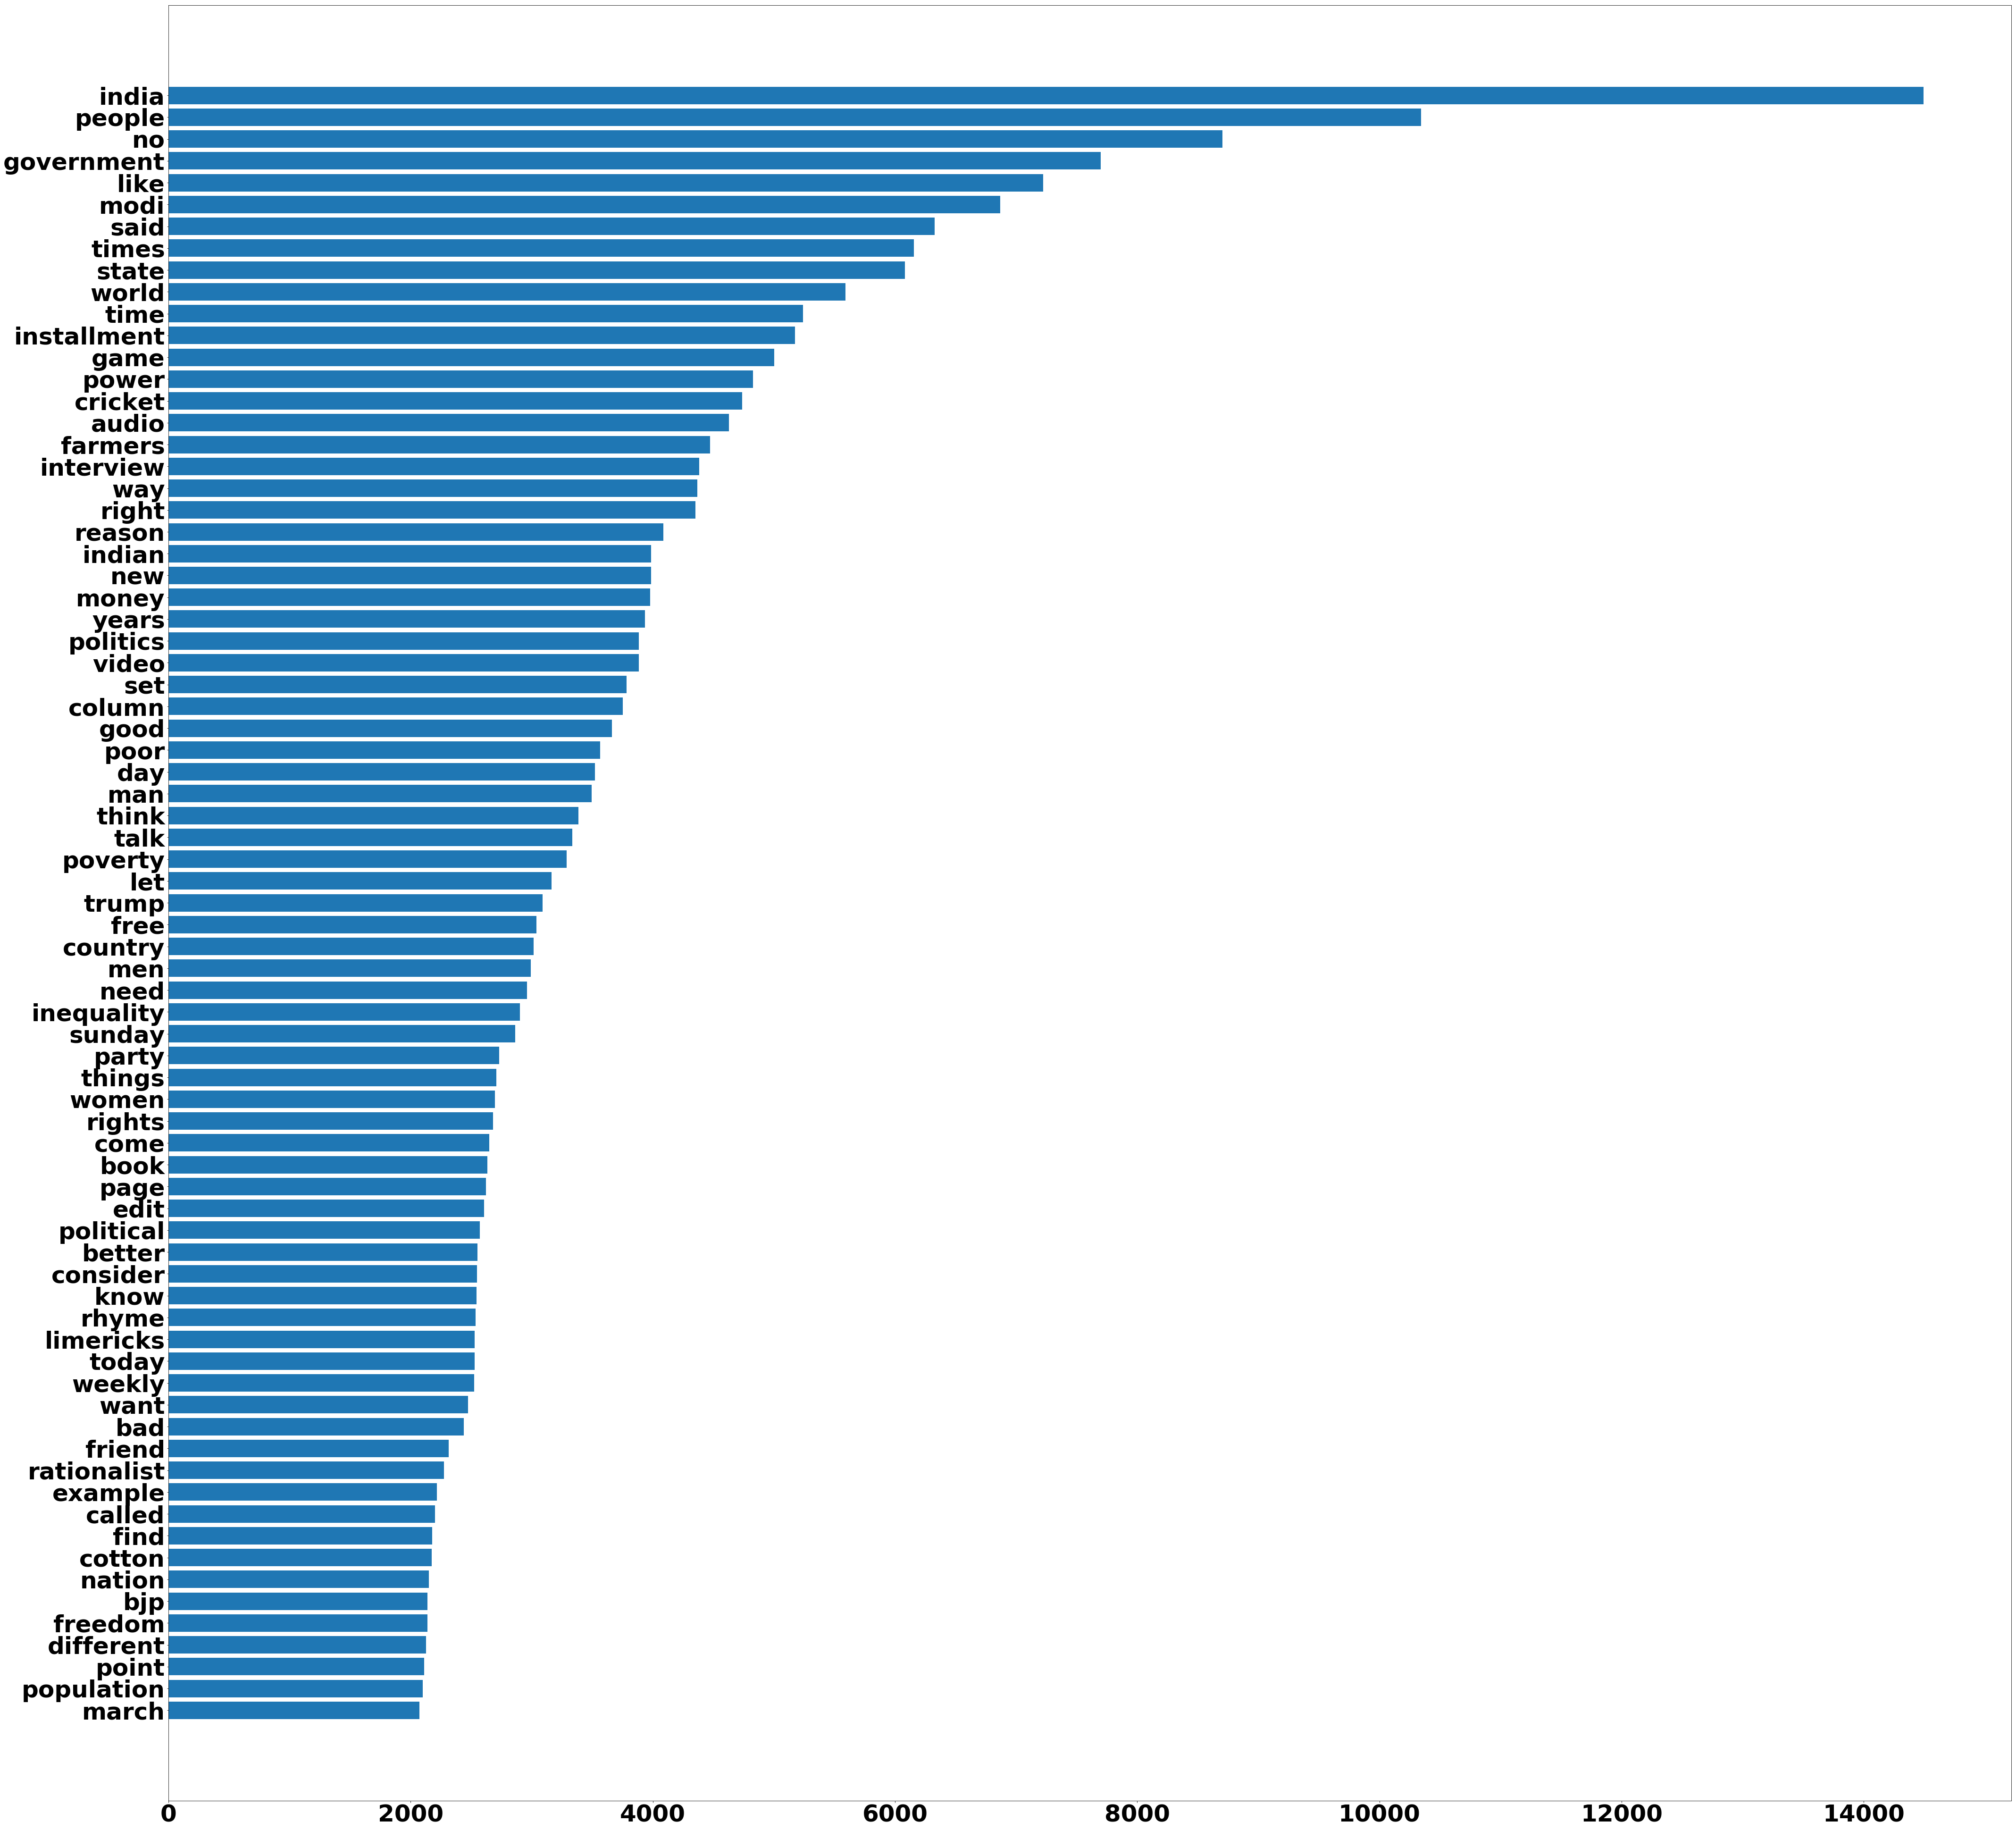

In [52]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 50}

plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(values[:75], counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Frequency plot of words in blogs with stopwords retained

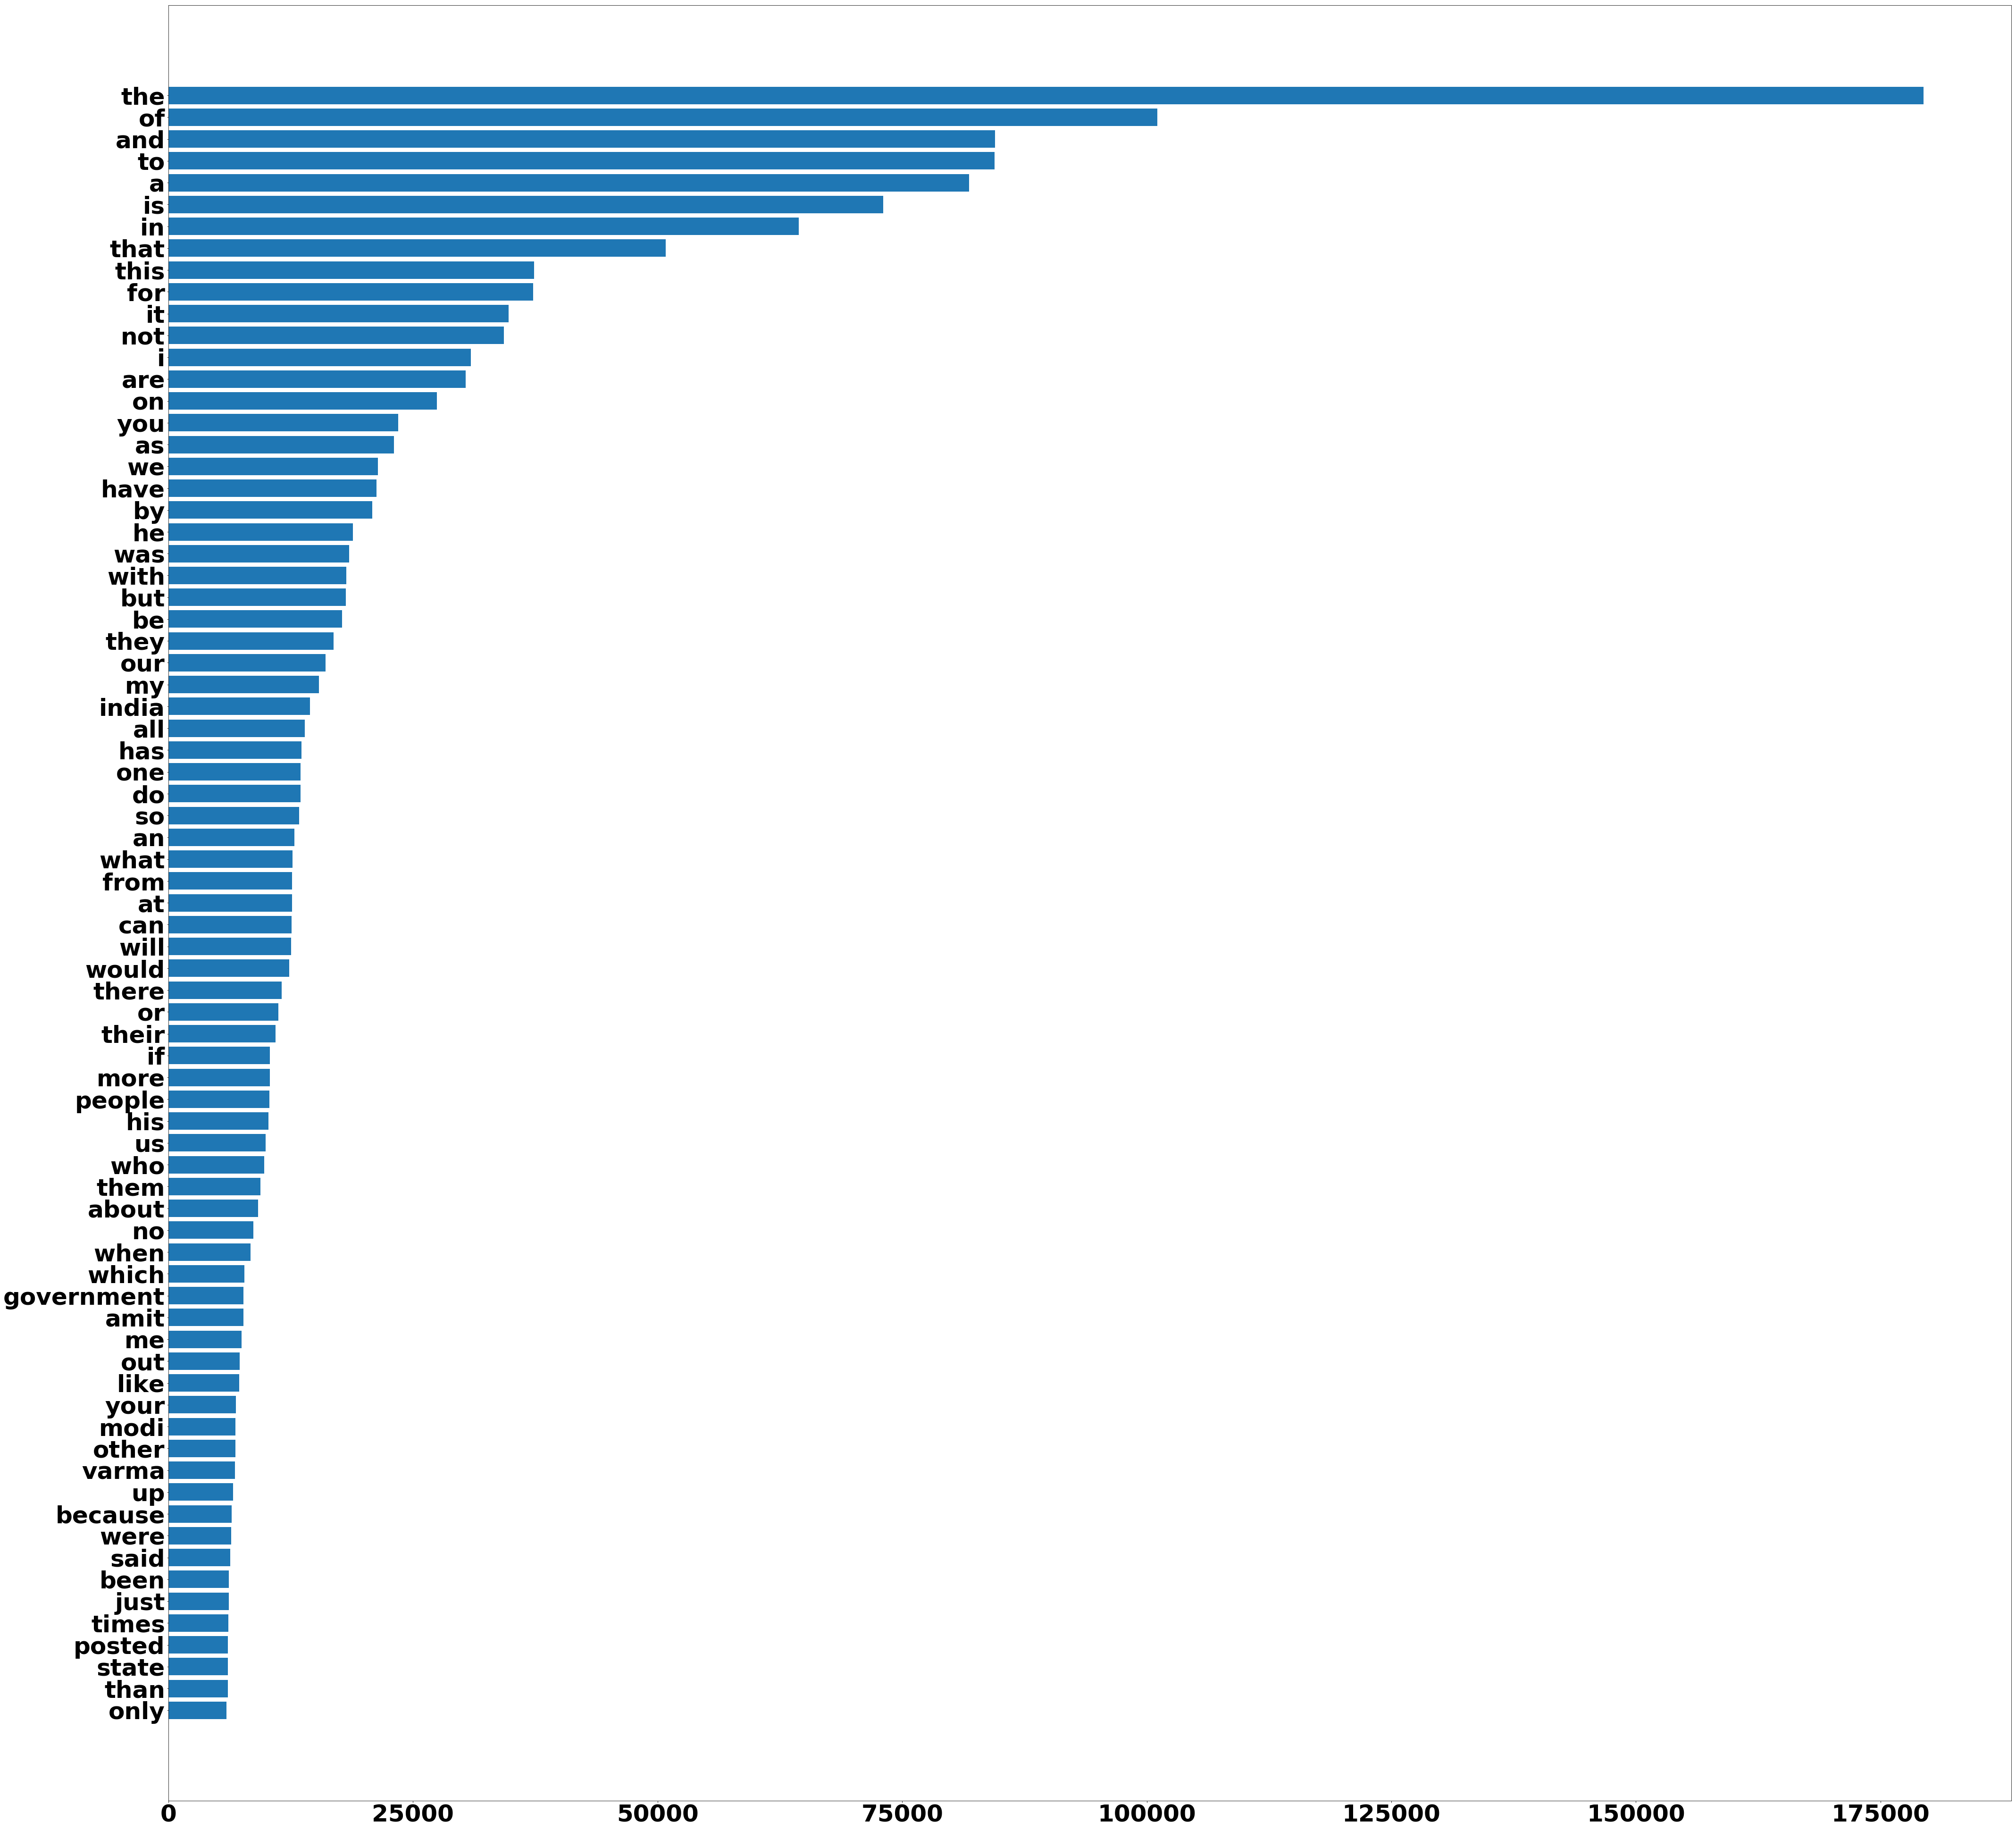

In [53]:
plt.rc('font', **font)
fig = plt.figure(figsize=(70,70))
plt.barh(all_values[:75], all_counts[:75])
plt.gca().invert_yaxis()
plt.show()

#### Observations from the Frequency Plots

1) The most occuring words present in both the graphs are quite different <br>
2) The most occuring words present in graph 1 (without stopwords) makes more sense.

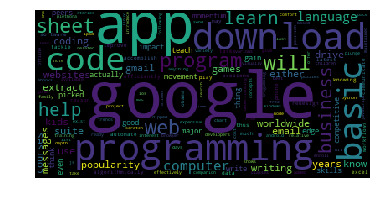

In [94]:
#!pip install wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud().generate(data['text'][1])
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

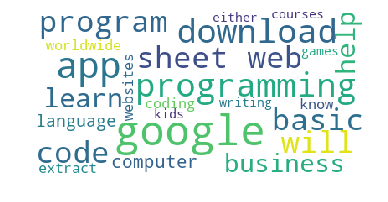

In [95]:
wordcloud = WordCloud(max_font_size=50, max_words=25, background_color="white").generate(data['text'][1])
plt.figure()
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDF

In [98]:
## tfidf vectorizer needs sentence and not token. Hence we need to combine all the tokens back to form a string

data['clean_text_stemmed'] = [' '.join(text) for text in data['clean_text_stemmed']]
data['clean_text_lemmatized'] = [' '.join(text) for text in data['clean_text_lemmatized']]

In [99]:
data['clean_text_lemmatized'][0]

'useful website internet smart increase productivity help learn new skill incredibly useful website solve problem cool url easy memorize save trip google know useful website miss list let know send send personalized email multiple people google sheet download gmail message attachment google drive extract email address gmail message save google sheet receive file size google drive track price favorite amazon item google sheet create smart twitt bot write single line code build bespoke solution use capability feature google automate business process drive business productivity deploy big company university worldwide installation download know india google'

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer

#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=20000,
                                 min_df=0.2,
                                 use_idf=True, ngram_range=(1,4))

tfidf_matrix = tfidf_vectorizer.fit_transform(data['clean_text_lemmatized'])

print(tfidf_matrix.shape)

(501, 11849)


In [102]:
terms = tfidf_vectorizer.get_feature_names()

In [103]:
print(type(terms))
terms[:5]

<class 'list'>


['aadhaar',
 'ability',
 'ability manage',
 'ability manage party',
 'ability manage party translate']

# K-mean Clustering

### Fitting the elbow curve to identify right number of clusters/topics

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import joblib
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(tfidf_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)
    

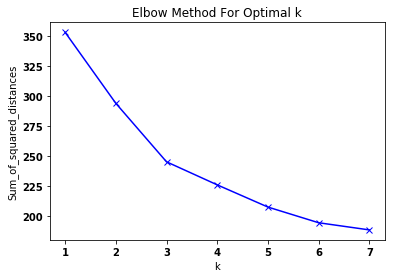

In [61]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [71]:
num_clusters = 3

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)
#km.labels_
clusters = km.labels_.tolist()
#km.cluster_centers
centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_cluster_best_K.pkl')

the cluster centers are [[0.00163919 0.00077462 0.00018541 ... 0.00017929 0.00017929 0.00017929]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00729697 0.0022087  0.00249612 ... 0.00320208 0.00320208 0.00320208]]


['doc_cluster_best_K.pkl']

### Getting the top words from each cluster

In [72]:
print(km.cluster_centers_)
print(km.cluster_centers_.shape)

[[0.00163919 0.00077462 0.00018541 ... 0.00017929 0.00017929 0.00017929]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.00729697 0.0022087  0.00249612 ... 0.00320208 0.00320208 0.00320208]]
(3, 16915)


#### argsort()
[1,2,3,5,4] -----> sort ---->[1,2,3,4,5]<br>
argsort------>[0,1,2,4,3] ---> index of the element in the original list

In [73]:
km.cluster_centers_.argsort()

array([[ 5395, 10065, 10066, ..., 13551, 15202,  7138],
       [    0, 11264, 11265, ..., 13928, 14499,  2908],
       [ 7827,  7828,  1330, ...,  9659, 10881,  7138]])

In [74]:
## Reversing the list so that index of max element is in 0th index
km.cluster_centers_.argsort()[:,::-1]

array([[ 7138, 15202, 13551, ..., 10066, 10065,  5395],
       [ 2908, 14499, 13928, ..., 11265, 11264,     0],
       [ 7138, 10881,  9659, ...,  1330,  7828,  7827]])

In [75]:
from __future__ import print_function

print("Top terms per cluster:")

#sort cluster centers by proximity to centroid and picking the top 6 words per cluster
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
for i in range(num_clusters):
    print()
    print("Top words in Cluster-%d :" % i, end='')
    print()
    for ind in order_centroids[i, :6]: #replace 6 with n words per cluster
        print('%s' % terms[ind].split(' '), end=',')

Top terms per cluster:

Top words in Cluster-0 :
['india'],['time'],['sex'],['spirit'],['blog'],['life'],
Top words in Cluster-1 :
['conversation'],['support'],['sort'],['brief'],['fascinating'],['smile'],
Top words in Cluster-2 :
['india'],['people'],['modi'],['government'],['farmer'],['state'],

In [76]:
data['cluster_group'] = clusters
data.pop('clean_text', None)
pd.DataFrame(data).head(6)

index        Author                     title  \
0  0      Amit Agarwal   Most Useful Websites      
1  1      Amit Agarwal   Learn to Code             
2  2      Amit Agarwal   Voice Dictation           
3  3      Amit Agarwal   The Best Mac Apps         
4  4      Amit Agarwal   Sell your music online    
5  5      Amit Agarwal   Mail Merge for Gmail      

                                                                      link  \
0  https://www.labnol.org/internet/101-useful-websites/18078/                
1  https://www.labnol.org/internet/learn-coding-online/28537/                
2  https://dictation.io/                                                     
3  https://www.labnol.org/software/essential-mac-utilities/9479/             
4  https://www.labnol.org/internet/sell-music-online/13403/                  
5  https://www.labnol.org/internet/personalized-mail-merge-in-gmail/20981/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

In [77]:
data.keys()

dict_keys(['index', 'Author', 'title', 'link', 'text', 'word_count', 'clean_text_stemmed', 'clean_text_lemmatized', 'text_stemmed', 'text_lemmatized', 'cluster_group'])

In [78]:
cluster_df = pd.DataFrame(data)

In [79]:
cluster_df['cluster_group'].value_counts()

0    257
2    132
1    57 
Name: cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [80]:
##Step 1
cluster_df['tokenized_text'] = [text.split(' ') for text in cluster_df['clean_text_lemmatized']]

In [81]:
##Step 2
grouped_text = cluster_df.groupby('cluster_group')['tokenized_text']

In [82]:
## Fetch entire tokenized text for specific group
grouped_text.get_group(0)

0      [useful, website, internet, smart, increase, productivity, help, learn, new, skill, incredibly, useful, website, solve, problem, cool, url, easy, memorize, save, trip, google, know, useful, website, miss, list, let, know, send, send, personalize, email, multiple, people, google, sheet, download, gmail, message, attachment, google, drive, extract, email, address, gmail, message, save, google, sheet, receive, file, size, google, drive, track, price, favorite, amazon, item, google, sheet, create, smart, twitter, bot, write, single, line, code, build, bespoke, solution, use, capability, feature, google, automate, business, process, drive, business, productivity, deploy, big, company, university, worldwide, installation, download, know, india, google]                                                                                                                       
1      [learn, code, movement, pick, momentum, worldwide, actually, good, thing, basic, programming, skill, major, im

In [83]:
from itertools import chain

In [84]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [85]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [86]:
frequent_words_df.head()

,cluster_id,values,counts
0,0,"[audio, interview, video, time, talk, say, india, set, march, like, reason, year, day, good, installment, people, know, come, july, page, february, limerick, sunday, rhyme, think, new, title, game, edit, way, weekly, cricket, man, tell, life, world, play, var, june, com, september, friend, write, april, go, win, work, great, find, need, thing, look, get, url, want, limit, woman, sport, radio, player, give, change, october, right, love, november, hand, cbc, team, ask, story, august, home, january, public, feel, roundtable, future, old, lose, link, twitter, poker, conference, text, fight, book, long, take, december, test, see, make, happen, live, question, let, start, medium, learn, ...]","[4631, 4068, 3820, 3122, 3031, 2253, 2184, 1544, 1500, 1492, 1490, 1466, 1362, 1344, 1299, 1284, 1268, 1266, 1261, 1225, 1212, 1212, 1209, 1199, 1186, 1168, 1164, 1159, 1138, 1130, 1123, 1097, 1065, 1035, 1015, 1009, 955, 945, 938, 912, 900, 888, 877, 871, 855, 851, 806, 800, 782, 778, 778, 768, 765, 754, 742, 732, 727, 710, 709, 706, 696, 694, 682, 673, 668, 668, 664, 664, 624, 624, 617, 613, 612, 607, 604, 602, 594, 587, 578, 574, 571, 559, 544, 540, 539, 512, 511, 510, 509, 507, 504, 504, 501, 499, 499, 498, 495, 493, 490, 487, ...]"
1,1,"[support, conversation, art, trifle, touch, sort, smile, sdsd, please, mystery, mehta, maupassant, lively, interest, idea, hit, guy, forth, fascinating, dina, define, de, dart, creative, company, chaos, brief, bored, weblog, word]","[114, 114, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]"
2,2,"[india, people, time, government, modi, good, state, right, like, farmer, say, come, man, power, country, world, way, poor, indian, thing, party, installment, year, need, reason, politic, think, money, column, trump, go, poverty, game, bad, great, law, know, want, day, inequality, woman, free, consider, vote, book, give, let, win, find, freedom, bjp, nation, term, get, political, economic, tell, set, problem, cricket, market, point, idea, cotton, rationalist, friend, tax, cost, new, look, example, interest, see, population, make, consent, call, election, today, sum, fact, group, fight, take, leader, life, work, question, truth, help, narendra, trade, tariff, write, nationalism, value, happen, person, grow, word, ...]","[14189, 9777, 8444, 8380, 8018, 6915, 6712, 6633, 5952, 5728, 5702, 5591, 5589, 4917, 4724, 4705, 4586, 4170, 4143, 4024, 3956, 3952, 3934, 3927, 3875, 3825, 3582, 3555, 3527, 3355, 3311, 3300, 3282, 3226, 3152, 3130, 3056, 3026, 2973, 2908, 2876, 2833, 2785, 2740, 2732, 2730, 2676, 2607, 2582, 2540, 2530, 2527, 2511, 2481, 2467, 2467, 2433, 2429, 2360, 2353, 2326, 2302, 2252, 2221, 2218, 2217, 2205, 2203, 2176, 2174, 2140, 2119, 2103, 2082, 2058, 2044, 2041, 2037, 2022, 2009, 2002, 2002, 1978, 1964, 1930, 1929, 1904, 1901, 1890, 1889, 1887, 1883, 1868, 1816, 1813, 1807, 1795, 1794, 1786, 1784, ...]"


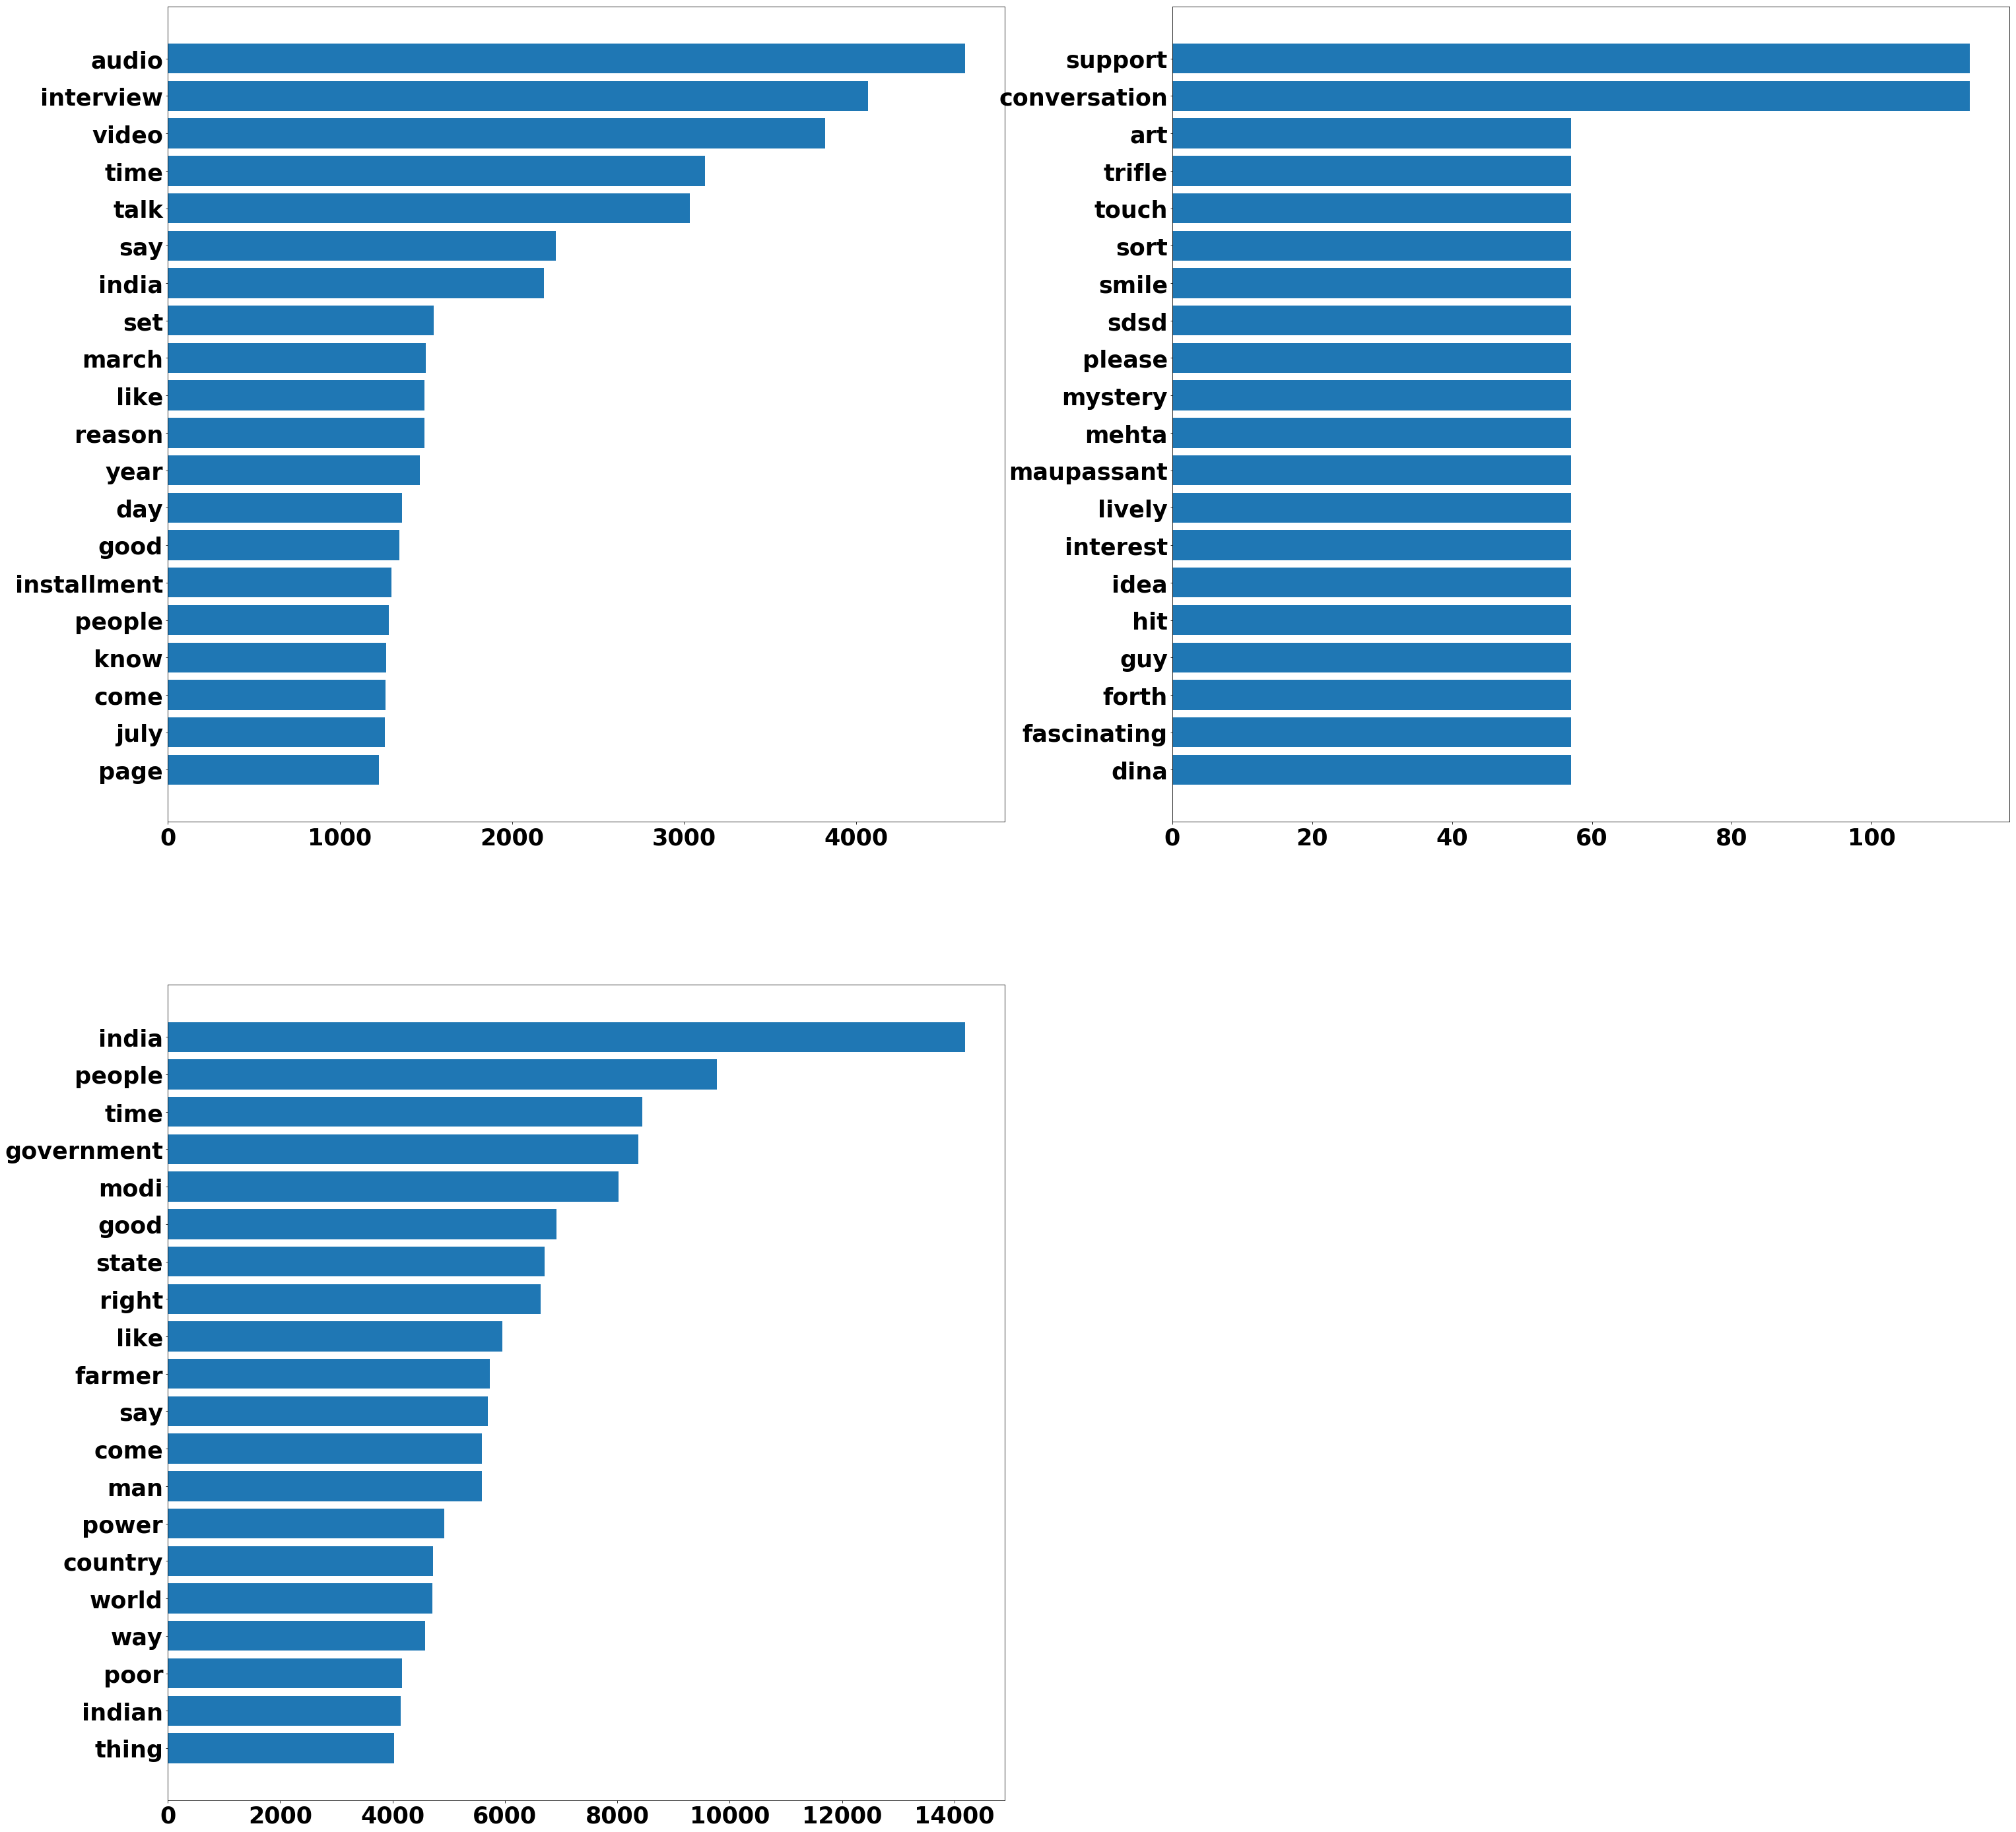

In [98]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()

### Truncated SVD (Latent Semantic Analysis - LSA) using Scikitlearn

<img src="SVD1.png">

In this case, U ∈ ℝ^(m ⨉ t) emerges as our document-topic matrix, and V ∈ ℝ^(n ⨉ t) becomes our term-topic matrix. In both U and V, the columns correspond to one of our t topics. 

In U, rows represent document vectors expressed in terms of topics; in V, rows represent term vectors expressed in terms of topics.

In [99]:
from sklearn.decomposition import TruncatedSVD

In [121]:
n_components = 26
svd_model = TruncatedSVD(n_components=n_components, algorithm='randomized',n_iter=20,random_state=143)

svd_matrix = svd_model.fit(tfidf_matrix)

svd_matrix

TruncatedSVD(algorithm='randomized', n_components=26, n_iter=20,
       random_state=143, tol=0.0)

In [122]:
print(f"Explained Variance Ratio : {svd_matrix.explained_variance_ratio_}") 
print(f"Total Explained Variance : {round(svd_matrix.explained_variance_ratio_.sum() * 100, 2)} %")
print(f"The singular values are {svd_matrix.singular_values_}")

Explained Variance Ratio : [0.13619704 0.1438482  0.08218379 0.06983512 0.05634304 0.03592586
 0.02228618 0.02120177 0.0205265  0.01625634 0.01491121 0.0145268
 0.01163625 0.01048267 0.00950965 0.00898216 0.00820019 0.00778042
 0.00763616 0.00740095 0.00713091 0.00696679 0.00665621 0.00662272
 0.00625666 0.00610415]
Total Explained Variance : 74.54 %
The singular values are [11.34703743  7.56404367  5.53268754  5.12202691  4.58674853  3.56546012
  2.83824623  2.74114694  2.70482271  2.39691739  2.29704637  2.26753783
  2.02962408  1.92717832  1.8341604   1.78159146  1.70299983  1.65826888
  1.64280611  1.61748597  1.58743846  1.56908278  1.53458747  1.53004552
  1.48693311  1.46874647]


### Picking the few most important words in each topic

The components of svd_model are our topics and we can access them using svdmodel.components.<br>
let's print a few most important words in each of the 4 topics and see how our model has done.

In [123]:
for i, comp in enumerate(svd_model.components_):
    print(f"The component is {comp} and shape is {comp.shape}")
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:6]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(f"{t[0]} -- {t[1]}")
    print(" ")

The component is [0.00816953 0.00266873 0.00250154 ... 0.00307111 0.00307111 0.00307111] and shape is (16915,)
Topic 0: 
india -- 0.2505100131397263
people -- 0.16704355652154412
modi -- 0.15268258284167627
time -- 0.1502130740467334
government -- 0.14555149276788787
farmer -- 0.12829131372807176
 
The component is [-0.00082627 -0.00017676 -0.00022757 ... -0.00031588 -0.00031588
 -0.00031588] and shape is (16915,)
Topic 1: 
conversation -- 0.4664009479511377
support -- 0.3817609300659228
sort -- 0.2785654476659877
brief -- 0.2522894297752256
fascinating -- 0.24889268074716892
smile -- 0.2309137931157009
 
The component is [ 0.00800801 -0.00066463 -0.00093981 ... -0.00220529 -0.00220529
 -0.00220529] and shape is (16915,)
Topic 2: 
limerick -- 0.12772487618456363
rhyme -- 0.12527049178885075
rhyme reason -- 0.12403509925246027
limerick sunday -- 0.12275170726965799
installment rhyme -- 0.1209955846952127
installment rhyme reason -- 0.1209955846952127
 
The component is [-0.01351286  0.0

### Tagging each document with a topic

In [124]:
doc_topic_matrix = svd_matrix.transform(tfidf_matrix)
print(doc_topic_matrix)
svd_categories = np.argmax(doc_topic_matrix, axis=1)
print(svd_categories)

[[ 0.10500161  0.01118908 -0.01130171 ...  0.03589929  0.04140901
   0.01995518]
 [ 0.16494756  0.01487207 -0.02686561 ...  0.04910843  0.05730257
  -0.01578908]
 [ 0.07786284  0.09588952  0.00234514 ... -0.02477456 -0.01862617
   0.13573859]
 ...
 [ 0.20887065 -0.00045267 -0.0306091  ... -0.07651709 -0.10500502
   0.1087998 ]
 [ 0.10643004  0.01075034 -0.0128056  ...  0.03464644  0.00880884
  -0.01876092]
 [ 0.14288375  0.02980033 -0.0030894  ... -0.05926172 -0.04332716
  -0.23944101]]
[ 6  6  6  6  6  6  6  0  3  3  3  3  8 23  8  0 14  0 14  0  0  0  0  0
  0 16  0  0 16  0  0  0  0  0  0 24  0 24 24 22 24  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  2 14  0  0  0  0  0  0  0  0  0  0
  0  0  0  2  2  8  2  0  0  2  2 14  0  0  0  0  0 22 14  0  0  0  0  0
  2  2  8  2  0  2  2  3  0  3  3 21  3  3  3  0  0  0  0  7  7  3  0  7
  0  0  5 17  3  0  0 21  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0 

In [125]:
data['SVD_group'] = svd_categories

In [126]:
pd.DataFrame(data).head(6)

index        Author                     title  \
0  0      Amit Agarwal   Most Useful Websites      
1  1      Amit Agarwal   Learn to Code             
2  2      Amit Agarwal   Voice Dictation           
3  3      Amit Agarwal   The Best Mac Apps         
4  4      Amit Agarwal   Sell your music online    
5  5      Amit Agarwal   Mail Merge for Gmail      

                                                                      link  \
0  https://www.labnol.org/internet/101-useful-websites/18078/                
1  https://www.labnol.org/internet/learn-coding-online/28537/                
2  https://dictation.io/                                                     
3  https://www.labnol.org/software/essential-mac-utilities/9479/             
4  https://www.labnol.org/internet/sell-music-online/13403/                  
5  https://www.labnol.org/internet/personalized-mail-merge-in-gmail/20981/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

#### Clustering the Document-Topic matrix

In [127]:
Sum_of_squared_distances = []
K = range(1,8)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=143)
    kmeanModel.fit(doc_topic_matrix)
    Sum_of_squared_distances.append(kmeanModel.inertia_)

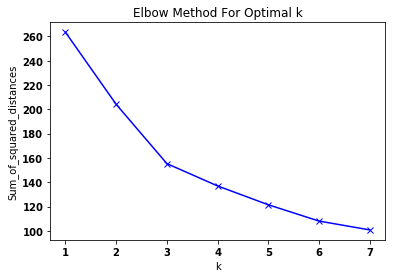

In [128]:
## Plot the elbow

## Distortion, on the y-axis, corresponds to our cost function: 
## the sum of squared difference between each data point and the centroid, i.e., the cluster centre.

## As K increases the corresponding distortion value will tend to zero, 
## because you end up having just one data point per cluster. With only one data point in per cluster, 
## the centroid is the data point itself, so the distortion will be equal to zero.

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [129]:
num_clusters = 3

km = KMeans(n_clusters=num_clusters)

km.fit(doc_topic_matrix)

clusters = km.labels_.tolist()

centers = km.cluster_centers_
print(f"the cluster centers are {centers}")

joblib.dump(km,  'doc_topic_cluster_best_K.pkl')

the cluster centers are [[ 2.59695393e-01  4.43366978e-03  1.63004064e-01  1.37795600e-01
   1.05925263e-01  3.28561031e-02  4.12754285e-02 -1.26352018e-02
   3.01687431e-02 -1.20033636e-03  6.92201380e-03  1.31358042e-02
  -9.03061797e-03  6.48612427e-03  5.60395652e-03  1.24869203e-03
  -7.12707925e-03  3.39538134e-03 -1.78593919e-03  1.76599223e-03
   1.71574563e-03  2.88366886e-03  7.70274645e-03 -1.95768405e-03
  -2.45356141e-04 -2.49882865e-03]
 [ 8.99185734e-01 -3.47014032e-02 -1.19484680e-01 -6.16778179e-02
  -2.87582456e-02 -3.44250012e-02 -9.92146114e-03 -3.60573217e-04
  -1.97364488e-02  5.74741781e-03  1.57343020e-03 -1.04483895e-02
   2.85818753e-03  2.71699292e-03 -9.74318449e-04  2.33757902e-05
   5.80733747e-03 -2.33791850e-03 -2.90392097e-04  1.51908759e-03
   9.06281086e-05 -2.49315354e-03 -6.00764748e-03 -5.47337150e-04
  -2.17612198e-03  2.00123330e-03]
 [ 7.37021342e-02  9.96745887e-01  6.24593156e-03 -1.57663665e-02
  -1.71536995e-02 -1.81380121e-02 -5.49140029e-0

['doc_topic_cluster_best_K.pkl']

In [130]:
clusters = km.labels_.tolist()
data['doc_topic_cluster_group'] = clusters

In [133]:
doc_cluster_df = pd.DataFrame(data)

In [134]:
doc_cluster_df['doc_topic_cluster_group'].value_counts()

0    257
1    132
2    57 
Name: doc_topic_cluster_group, dtype: int64

#### Fetching the most frequent words among each cluster

Step 1) Tokenize the entire text <br>
Step 2) Group the tokenized text by cluster id (output is list of lists: [[],[],[]])<br>
Step 3) Unlist the array of lists for each cluster group using chain function from itertools

In [136]:
##Step 1
doc_cluster_df['tokenized_text'] = [text.split(' ') for text in doc_cluster_df['clean_text_lemmatized']]

In [137]:
##Step 2
grouped_text = doc_cluster_df.groupby('doc_topic_cluster_group')['tokenized_text']

In [138]:
frequent_words_df = pd.DataFrame(columns={"values", "counts", "cluster_id"})

In [139]:
for num in range(num_clusters):
    values, counts = np.unique(list(chain.from_iterable(grouped_text.get_group(num))), return_counts=True)
    sorted_indices = np.argsort(-counts)
    frequent_words_df = frequent_words_df.append({"values":values[sorted_indices], "counts":counts[sorted_indices], "cluster_id": num}, ignore_index=True)

In [140]:
frequent_words_df.head()

,cluster_id,values,counts
0,0,"[audio, interview, video, time, talk, say, india, set, march, like, reason, year, day, good, installment, people, know, come, july, page, february, limerick, sunday, rhyme, think, new, title, game, edit, way, weekly, cricket, man, tell, life, world, play, var, june, com, september, friend, write, april, go, win, work, great, find, need, thing, look, get, url, want, limit, woman, sport, radio, player, give, change, october, right, love, november, hand, cbc, team, ask, story, august, home, january, public, feel, roundtable, future, old, lose, link, twitter, poker, conference, text, fight, book, long, take, december, test, see, make, happen, live, question, let, start, medium, learn, ...]","[4631, 4068, 3820, 3122, 3031, 2253, 2184, 1544, 1500, 1492, 1490, 1466, 1362, 1344, 1299, 1284, 1268, 1266, 1261, 1225, 1212, 1212, 1209, 1199, 1186, 1168, 1164, 1159, 1138, 1130, 1123, 1097, 1065, 1035, 1015, 1009, 955, 945, 938, 912, 900, 888, 877, 871, 855, 851, 806, 800, 782, 778, 778, 768, 765, 754, 742, 732, 727, 710, 709, 706, 696, 694, 682, 673, 668, 668, 664, 664, 624, 624, 617, 613, 612, 607, 604, 602, 594, 587, 578, 574, 571, 559, 544, 540, 539, 512, 511, 510, 509, 507, 504, 504, 501, 499, 499, 498, 495, 493, 490, 487, ...]"
1,1,"[india, people, time, government, modi, good, state, right, like, farmer, say, come, man, power, country, world, way, poor, indian, thing, party, installment, year, need, reason, politic, think, money, column, trump, go, poverty, game, bad, great, law, know, want, day, inequality, woman, free, consider, vote, book, give, let, win, find, freedom, bjp, nation, term, get, political, economic, tell, set, problem, cricket, market, point, idea, cotton, rationalist, friend, tax, cost, new, look, example, interest, see, population, make, consent, call, election, today, sum, fact, group, fight, take, leader, life, work, question, truth, help, narendra, trade, tariff, write, nationalism, value, happen, person, grow, word, ...]","[14189, 9777, 8444, 8380, 8018, 6915, 6712, 6633, 5952, 5728, 5702, 5591, 5589, 4917, 4724, 4705, 4586, 4170, 4143, 4024, 3956, 3952, 3934, 3927, 3875, 3825, 3582, 3555, 3527, 3355, 3311, 3300, 3282, 3226, 3152, 3130, 3056, 3026, 2973, 2908, 2876, 2833, 2785, 2740, 2732, 2730, 2676, 2607, 2582, 2540, 2530, 2527, 2511, 2481, 2467, 2467, 2433, 2429, 2360, 2353, 2326, 2302, 2252, 2221, 2218, 2217, 2205, 2203, 2176, 2174, 2140, 2119, 2103, 2082, 2058, 2044, 2041, 2037, 2022, 2009, 2002, 2002, 1978, 1964, 1930, 1929, 1904, 1901, 1890, 1889, 1887, 1883, 1868, 1816, 1813, 1807, 1795, 1794, 1786, 1784, ...]"
2,2,"[support, conversation, art, trifle, touch, sort, smile, sdsd, please, mystery, mehta, maupassant, lively, interest, idea, hit, guy, forth, fascinating, dina, define, de, dart, creative, company, chaos, brief, bored, weblog, word]","[114, 114, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57]"


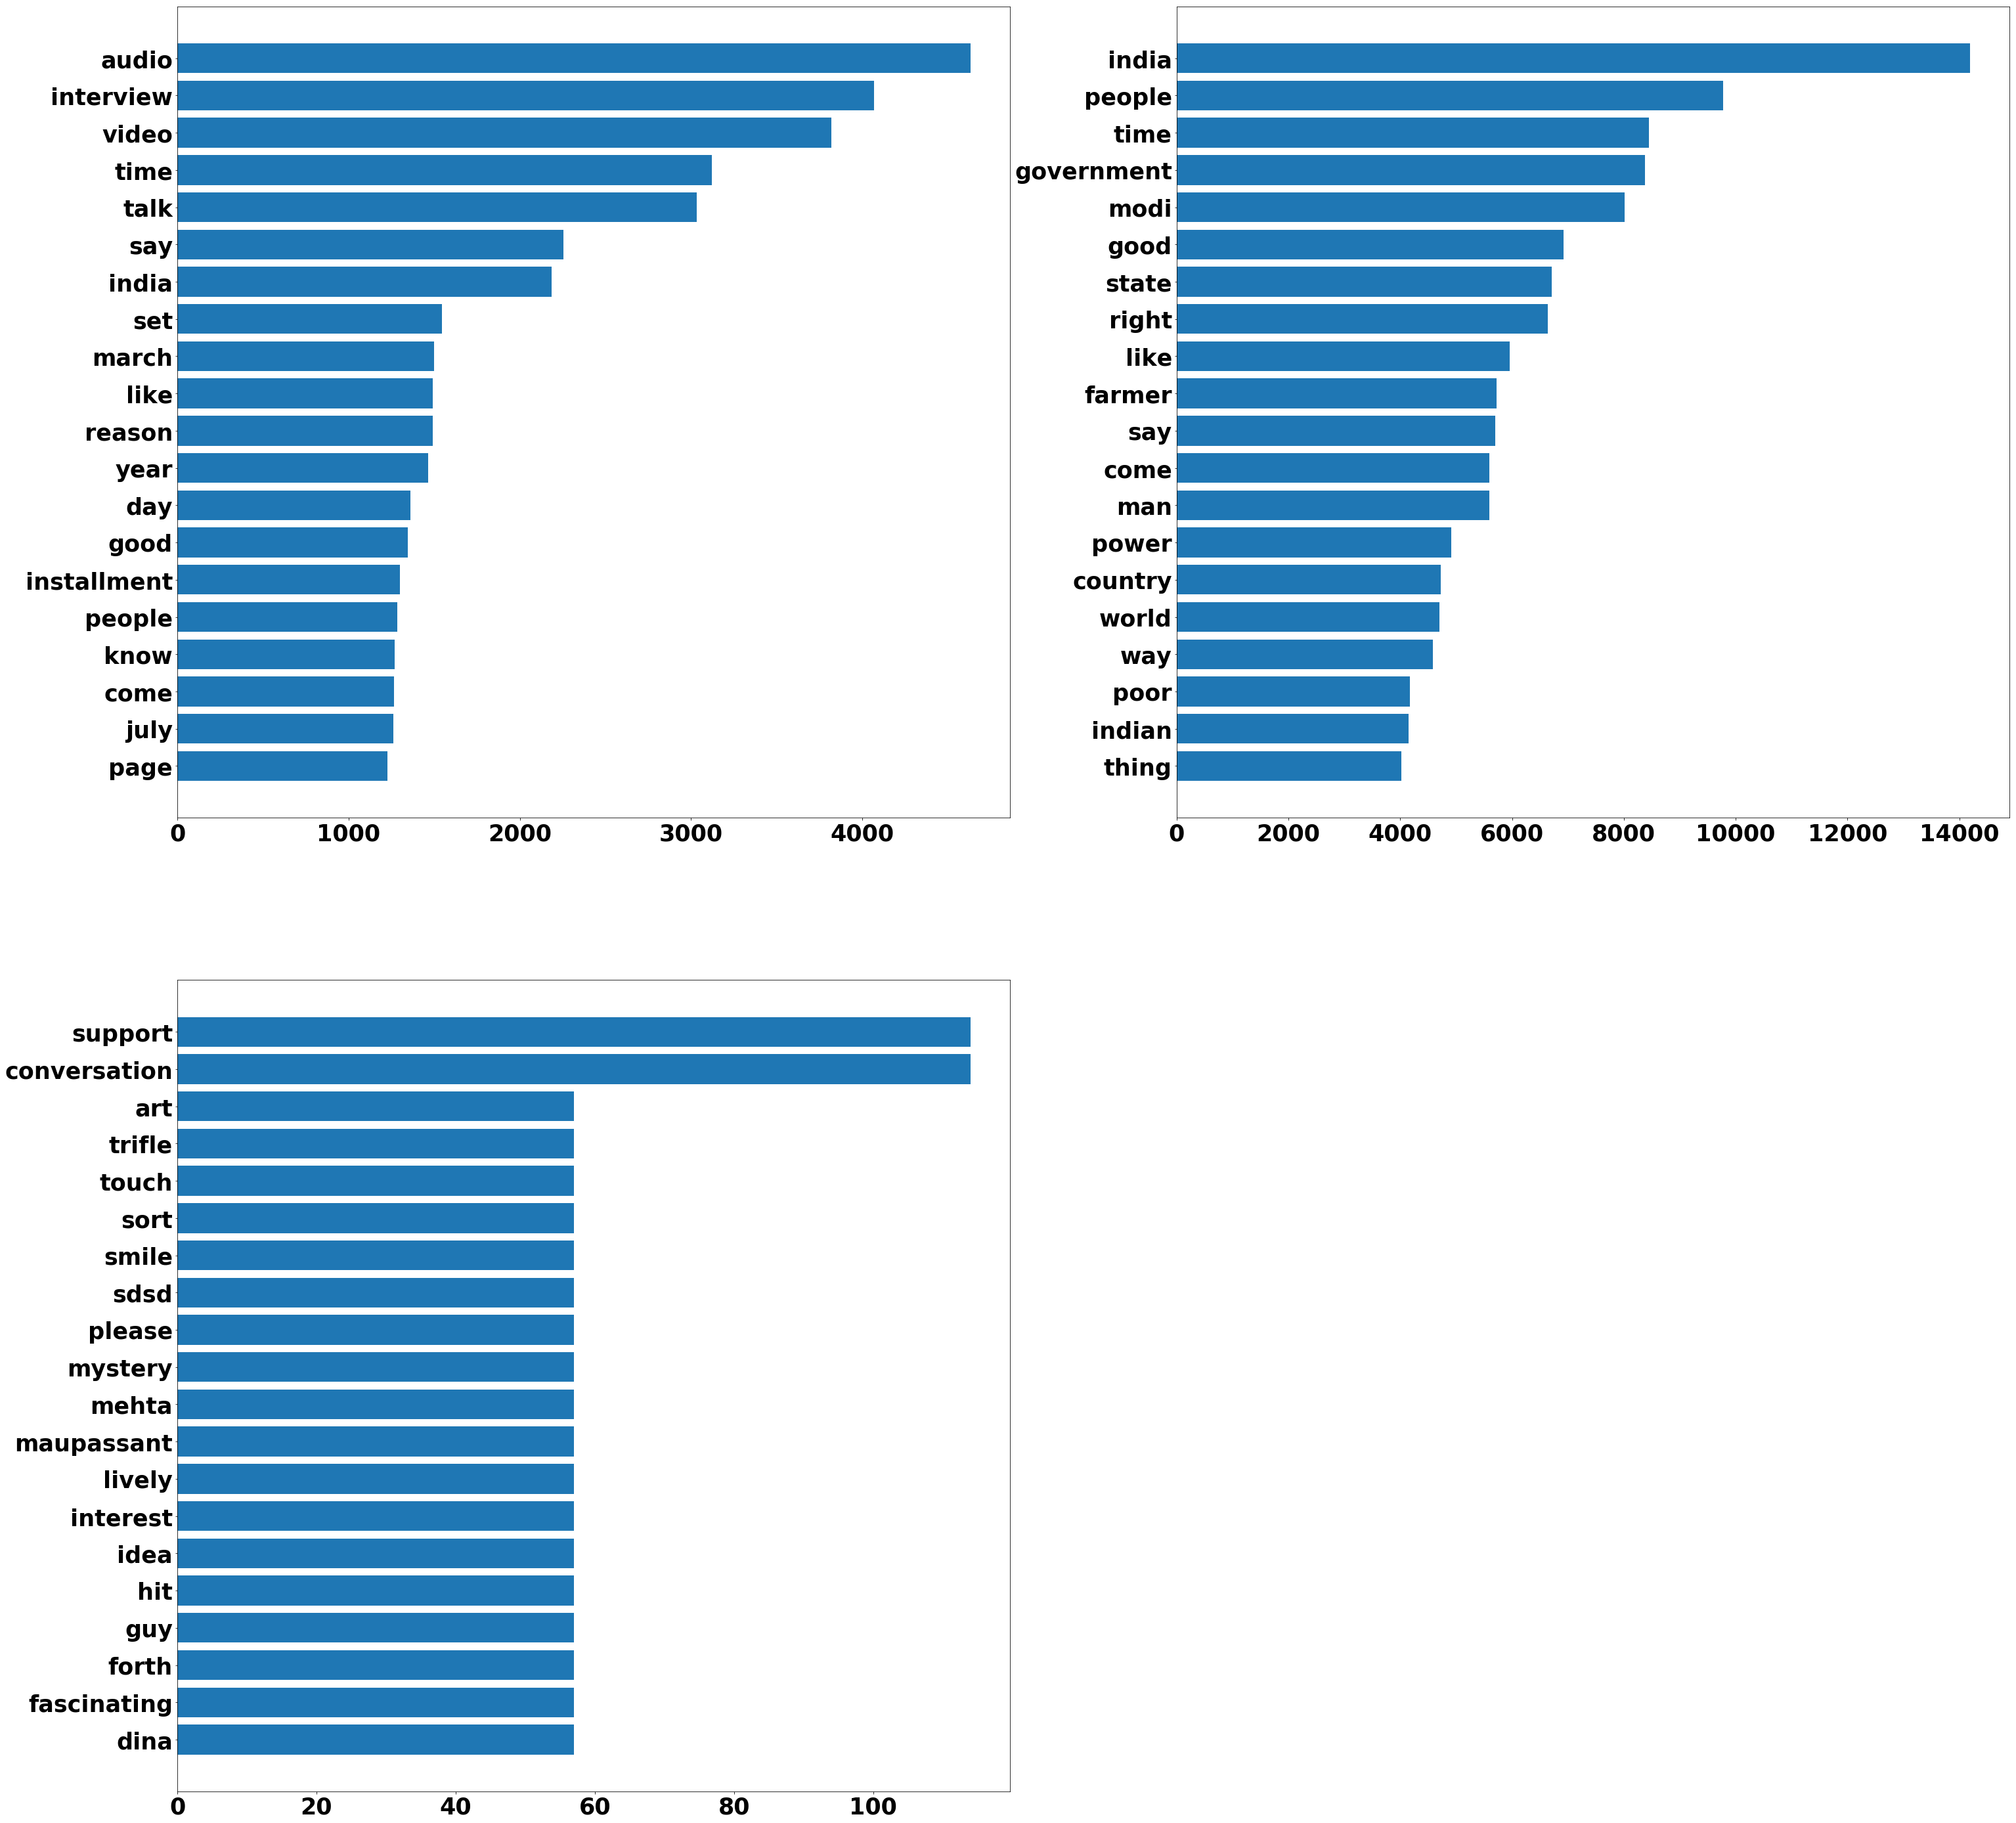

In [141]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 35}

plt.rc('font', **font)

fig = plt.figure(figsize=(50,50))
plt.subplot(2,2,1)
plt.barh(frequent_words_df.loc[0,'values'][:20], frequent_words_df.loc[0,'counts'][:20])
plt.gca().invert_yaxis()


plt.subplot(2,2,2)
plt.barh(frequent_words_df.loc[1,'values'][:20], frequent_words_df.loc[1,'counts'][:20])
plt.gca().invert_yaxis()

plt.subplot(2,2,3)
plt.barh(frequent_words_df.loc[2,'values'][:20], frequent_words_df.loc[2,'counts'][:20])
plt.gca().invert_yaxis()

#### Observations

We can notice that the frequency plots of words for clustering on tfidf matrix and document-topic matrix are same.
Hence the above step can be used to validate our results.